# Лабораторная работа 2. Описательная статистика.
## Титульная информация

Бровкин Аким Алексеевич, ИСУ 465282, группа J3110
Воробьёв Андрей Павлович, ИСУ 465440, группа J3111
Шакина Анна Сергеевна, ИСУ 396675, группа J3111

In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

1. Выберите два распределения (одно дискретное, другое непрерывное). Сгенерируйте, используя
библиотеки, выборку из N = 1000 значений для каждого из распределений.


Распределение Пуассона задаётся по формуле
$$
f(x) = \frac{\lambda^x e^{-\lambda}}{x!}
$$
где $\lambda$ - среднее значение, $x$ - количество событий.

Нормальное распределение задаётся по формуле
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
где $\mu$ - математическое ожидание, $\sigma$ - стандартное отклонение.

In [2]:
np.random.seed(2006)
n = 1000

# Генерация дискретного распределения (Пуассон)
lambda_poisson = 2.3
poisson_data = np.random.poisson(lambda_poisson, size=n)

# Генерация непрерывного распределения (нормальное)
mu = 0
sigma = 1
normal_data = np.random.normal(mu, sigma, size=n)

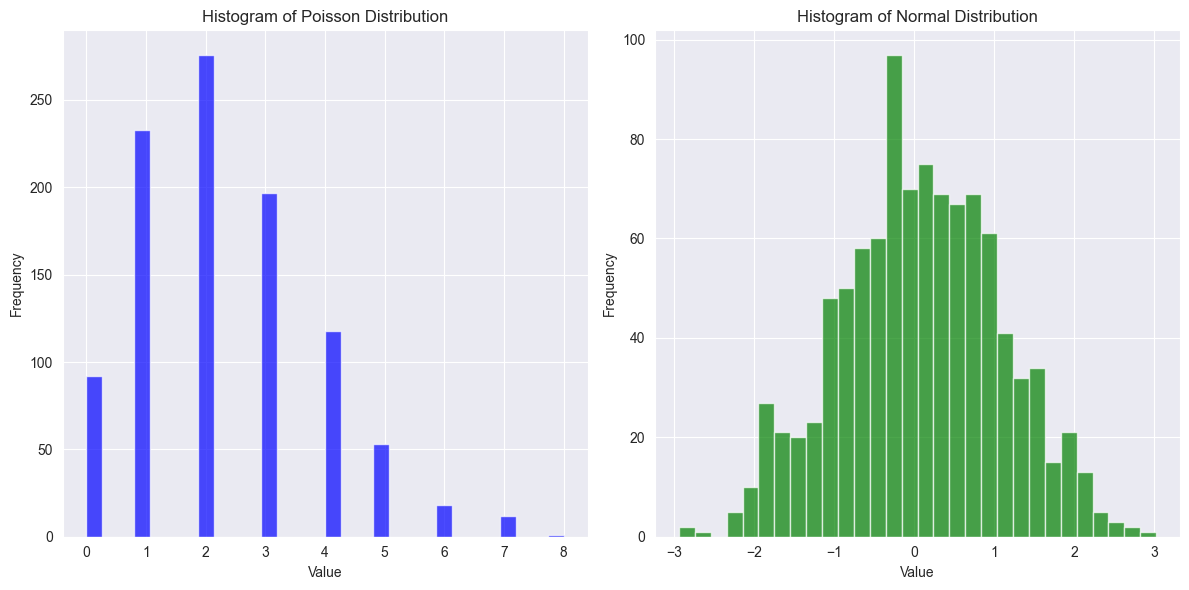

In [3]:
# Визуализация данных
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(poisson_data, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normal_data, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Для каждой выборки:

Рассчитайте основные описательные статистики:
* Квартили: Q1, Q2, Q3.
* Меры центральной тенденции: выборочное среднее, медиана, мода.
* Меры вариабельности: размах выборки, интерквартильный размах, дисперсия, стандартное отклонение, коэффициент вариации, среднее абсолютное отклонение.
* Меры формы распределения: коэффициенты асимметрии, эксцесса.
* Первые 5 начальных и центральных моментов (допускается использование смещенных характеристик).

Постройте графики:
* Эмпирическую функцию распределения eCDF с наложением ее на теоретическую CDF;
* Эмпирическую плотность распределения (гистограмму) ePDF для непрерывного распределения с наложением ее на теоретическую PDF; Постройте несколько вариантов гистограммы: с автоматическим выбором количества бинов, с выбором по одной из известных формул и подберите вручную какое-то количество, которое покажется визуально оптимальным.
* Эмприческую функцию вероятности (многоугольник вероятности) для дискретного
распределения с наложением ее на теоретическую функцию вероятности;
* Boxplot с выделением выбросов (по правилу 1.5 · IQR).

Исследуйте устойчивость характеристик. Рассмотрите выборку из непрерывного распределения и
* добавьте к выборке 5% выбросов (значения, которые лежат в области низкой вероятности появления),
* пересчитайте статистики из пункта (a) и сравните с исходными
* постройте графики изменения изменения мер вариабельности при постепенном добавлении выбросов (0%, 1%, ..., 5%). Возьмите не менее 10 процентных пунктов.
* Сделайте выводы об устойчивости этих характеристик.


In [4]:
# Функция для расчета основных описательных статистик
def get_stats(data):
    # Квартили
    Q1 = np.percentile(data, 25)  # 25-й процентиль
    Q2 = np.percentile(data, 50)  # 50-й процентиль (медиана)
    Q3 = np.percentile(data, 75)  # 75-й процентиль
    # Меры центральной тенденции
    mean = np.mean(data)  # выборочное среднее
    median = np.median(data)  # медиана
    mode = stats.mode(data, keepdims=True).mode[0]  # мода
    # Меры вариабельности
    range = np.max(data) - np.min(data)  # размах выборки
    iqr = Q3 - Q1  # интерквартильный размах
    variance = np.var(data)  # дисперсия
    std_dev = np.std(data)  # стандартное отклонение
    cv = std_dev / mean  # коэффициент вариации
    mad = np.mean(np.abs(data - mean))  # среднее абсолютное отклонение
    # Меры формы распределения
    skewness = stats.skew(data)  # коэффициент асимметрии
    kurtosis = stats.kurtosis(data)  # коэффициент эксцесса
    # Первые 5 начальных и центральных моментов
    moments = [np.mean(data), np.var(data), stats.skew(data),
               stats.kurtosis(data),
               np.mean(np.abs(data - mean))]  # первые 5 моментов

    # Создание DataFrame для удобного отображения
    result = pd.DataFrame({
        'Характеристика': ['Q1', 'Q2', 'Q3', 'Выборочное среднее', 'Медиана', 'Мода', 'Размах выборки',
                           'Интерквартильный размах', 'Дисперсия', 'Стандартное отклонение', 'Коэффициент вариации',
                           'Cреднее абсолютное отклонение', 'Коэффициент асимметрии', 'Коэффициент эксцесса',
                           'Первый момент', 'Второй момент', 'Третий момент', 'Четвертый момент', 'Пятый момент'],
        'Значение': [Q1, Q2, Q3, mean, median, mode, range,
                     iqr, variance, std_dev, cv, mad, skewness,
                     kurtosis, moments[0], moments[1], moments[2], moments[3],
                     moments[4]]
    })
    result.set_index('Характеристика', inplace=True)
    return result


# Дискретное распределение (Пуассон)

Основные описательные статистики

In [5]:
poisson_stats = get_stats(poisson_data)
poisson_stats

,Значение
Характеристика,
Q1,1.000000
Q2,2.000000
Q3,3.000000
Выборочное среднее,2.313000
Медиана,2.000000
Мода,2.000000
Размах выборки,8.000000
Интерквартильный размах,2.000000
Дисперсия,2.273031


Эмпирическая функция распределения задаётся по формуле
$$
F(x) = P(X \leq x) = \frac{1}{N} \sum_{i=1}^{N} I(X_i \leq x)
$$
где $I(X_i \leq x)$ - индикаторная функция, которая равна 1, если $X_i \leq x$, и 0 в противном случае.

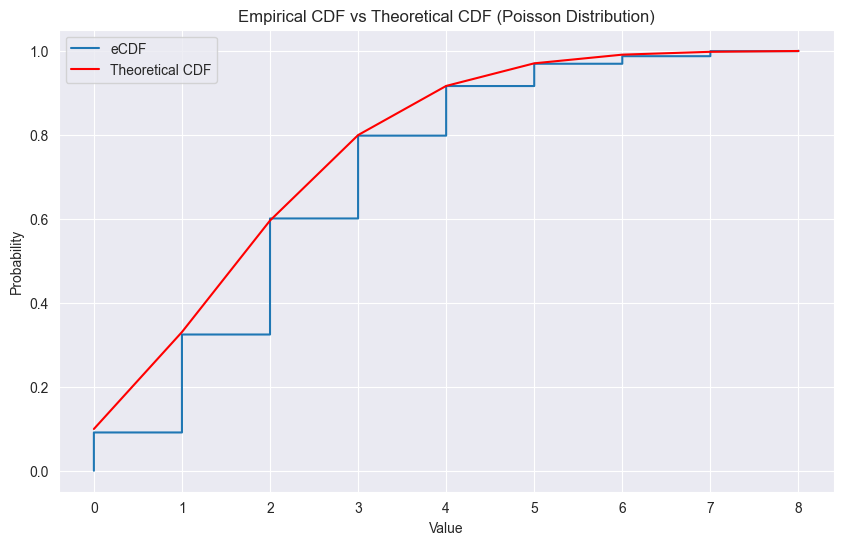

In [6]:
plt.figure(figsize=(10, 6))

# Эмпирическая функция распределения eCDF
x_poisson = np.sort(poisson_data)
ecdf_poisson = np.arange(1, n + 1) / n
plt.step(x_poisson, ecdf_poisson, label='eCDF', where='post')

# Теоретическая функция распределения CDF
x = np.arange(0, np.max(poisson_data) + 1)
theoretical_cdf_poisson = stats.poisson.cdf(x, lambda_poisson)
plt.plot(x, theoretical_cdf_poisson, label='Theoretical CDF', color='red')

plt.title('Empirical CDF vs Theoretical CDF (Poisson Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

Эмпирическая функция вероятности задаётся по формуле
$$
P(X = x) = \frac{n_x}{N}
$$
где $n_x$ - количество наблюдений, равных $x$, $N$ - общее количество наблюдений.

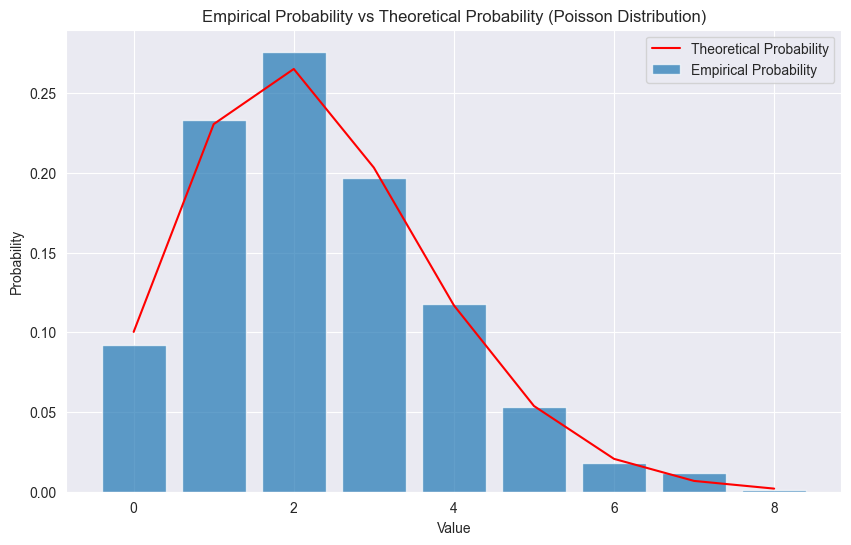

In [7]:
plt.figure(figsize=(10, 6))

# Эмпирическая функция вероятности
x_poisson_prob = np.arange(0, np.max(poisson_data) + 1)
empirical_prob_poisson = np.array([(poisson_data == x).sum() for x in x_poisson_prob]) / n
plt.bar(x_poisson_prob, empirical_prob_poisson, label='Empirical Probability', alpha=0.7)

# Теоретическая функция вероятности
theoretical_prob_poisson = stats.poisson.pmf(x_poisson_prob, lambda_poisson)
plt.plot(x_poisson_prob, theoretical_prob_poisson, label='Theoretical Probability', color='red')

plt.title('Empirical Probability vs Theoretical Probability (Poisson Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

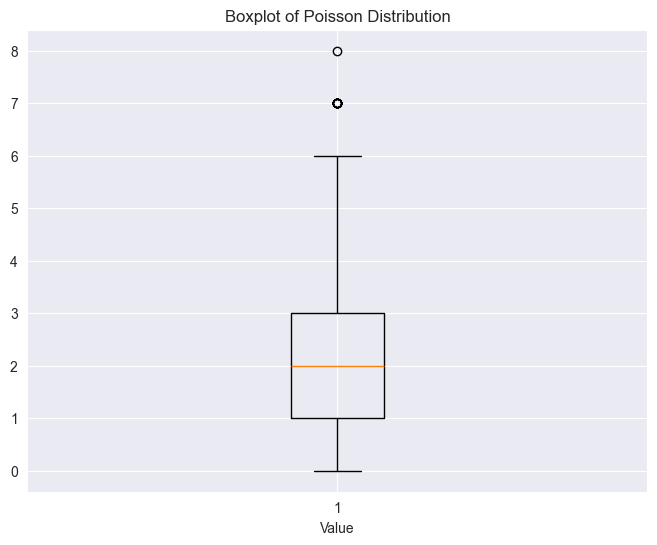

In [8]:
# Построение boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(poisson_data)
plt.title('Boxplot of Poisson Distribution')
plt.xlabel('Value')
plt.show()

# Непрерывное распределение (нормальное)

Основные описательные статистики

In [9]:
normal_stats = get_stats(normal_data)
normal_stats

,Значение
Характеристика,
Q1,-0.598686
Q2,0.065611
Q3,0.762766
Выборочное среднее,0.074946
Медиана,0.065611
Мода,-2.943279
Размах выборки,5.971510
Интерквартильный размах,1.361452
Дисперсия,1.004355


Эмпирическая функция распределения задаётся по формуле
$$
F(x) = P(X \leq x) = \frac{1}{N} \sum_{i=1}^{N} I(X_i \leq x)
$$
где $I(X_i \leq x)$ - индикаторная функция, которая равна 1, если $X_i \leq x$, и 0 в противном случае.

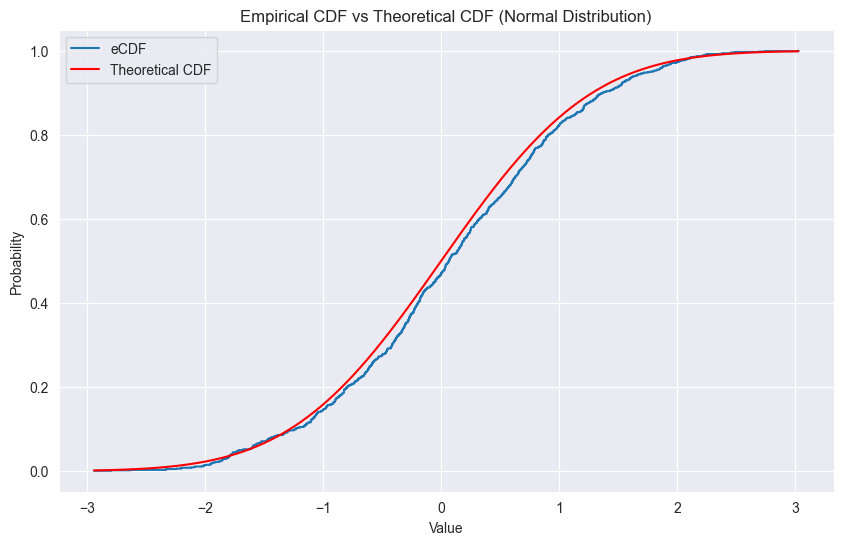

In [10]:
plt.figure(figsize=(10, 6))

# Эмпирическая функция распределения eCDF
x_normal = np.sort(normal_data)
ecdf_normal = np.arange(1, n + 1) / n
plt.step(x_normal, ecdf_normal, label='eCDF', where='post')

# Теоретическая функция распределения CDF
x = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
theoretical_cdf_normal = stats.norm.cdf(x, mu, sigma)
plt.plot(x, theoretical_cdf_normal, label='Theoretical CDF', color='red')

plt.title('Empirical CDF vs Theoretical CDF (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

Эмпирическая плотность распределения задаётся по формуле
$$
h_j = \frac{ \#\{X_i \in B_j\} }{n \cdot |B_j|}
$$
где $B_j$ - j-й интервал, $|B_j|$ - длина интервала, $\#\{X_i \in B_j\}$ - количество наблюдений в интервале.

Формула Скотта для выбора количества бинов
$$
h = \frac{3.5 \cdot \sigma}{n^{1/3}}
$$
где $h$ - ширина бина, $\sigma$ - стандартное отклонение, $n$ - количество наблюдений.

C:\Users\user\AppData\Local\Temp\ipykernel_3372\1825360070.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  3.5 * normal_stats.loc["Стандартное отклонение"][0] / (n ** (1 / 3)))))


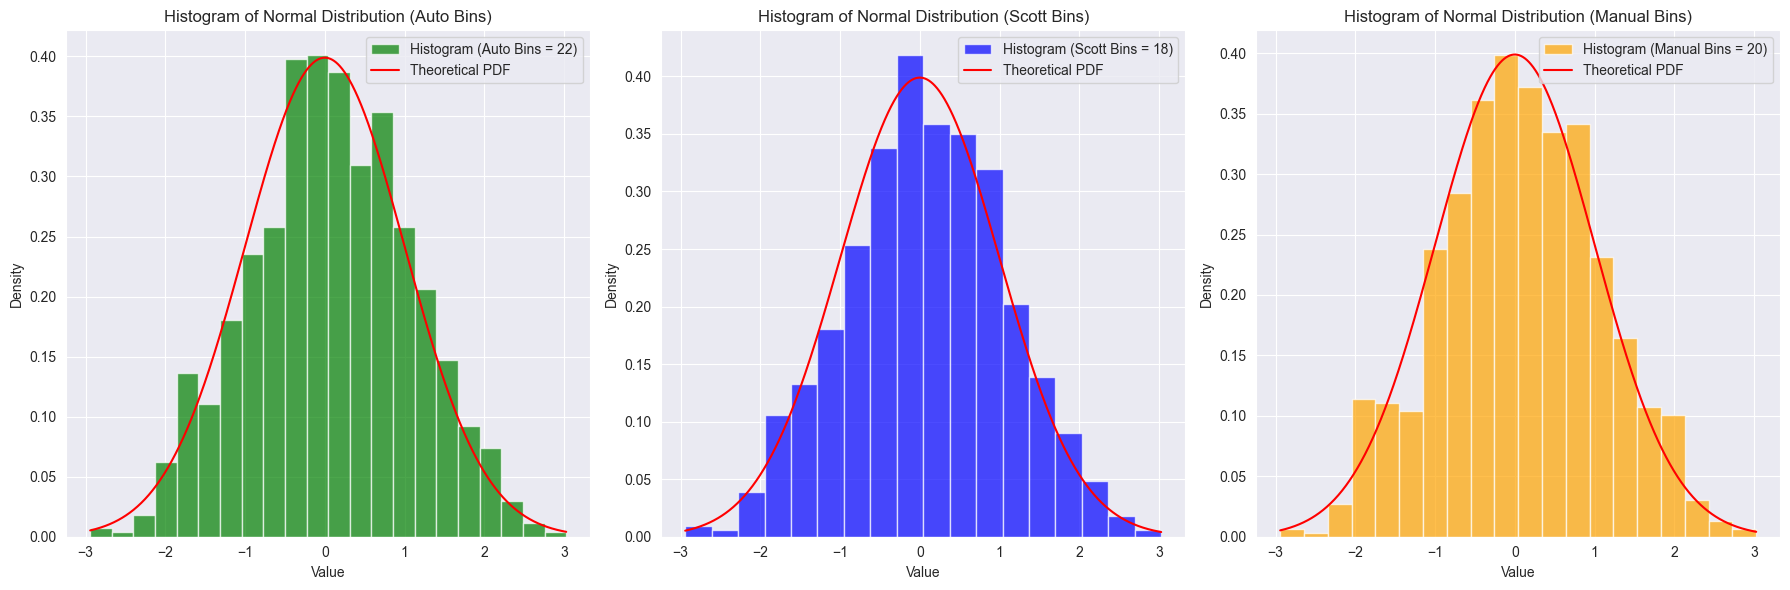

In [11]:
plt.figure(figsize=(18, 6))


def plot_teoretical_pdf():
    x = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
    theoretical_pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, theoretical_pdf, label='Theoretical PDF', color='red')


# Автоматический выбор количества бинов
plt.subplot(1, 3, 1)
bin_edges_auto = np.histogram_bin_edges(normal_data, bins='auto')  # Получение границ бинов
num_bins_auto = len(bin_edges_auto) - 1  # Количество бинов
plt.hist(normal_data, bins='auto', density=True, alpha=0.7, color='green',
         label=f'Histogram (Auto Bins = {num_bins_auto})')
plot_teoretical_pdf()
plt.title('Histogram of Normal Distribution (Auto Bins)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Выбор количества бинов по формуле Скотта
plt.subplot(1, 3, 2)
num_bins_scott = int(np.ceil((np.max(normal_data) - np.min(normal_data)) / (
        3.5 * normal_stats.loc["Стандартное отклонение"][0] / (n ** (1 / 3)))))
plt.hist(normal_data, bins=num_bins_scott, density=True, alpha=0.7, color='blue',
         label=f'Histogram (Scott Bins = {num_bins_scott})')
plot_teoretical_pdf()
plt.title('Histogram of Normal Distribution (Scott Bins)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Ручной выбор количества бинов
plt.subplot(1, 3, 3)
num_bins_manual = 20
plt.hist(normal_data, bins=num_bins_manual, density=True, alpha=0.7, color='orange',
         label=f'Histogram (Manual Bins = {num_bins_manual})')
plot_teoretical_pdf()
plt.title('Histogram of Normal Distribution (Manual Bins)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

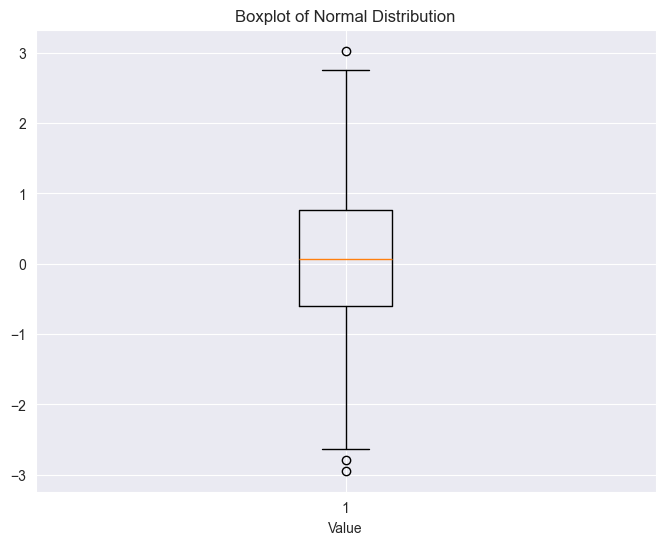

In [12]:
# Построение boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(normal_data)
plt.title('Boxplot of Normal Distribution')
plt.xlabel('Value')
plt.show()

Исследование на устойчивость характеристик

In [13]:
# Выбор величин для выбросов
proportion = np.random.random()  # Пропорция сколько выбросов будет левее
left_left = np.random.randint(-100, -5)  # Левая граница левого выброса
left_right = np.random.randint(left_left, -5)  # Правая граница левого выброса
right_left = np.random.randint(5, 100)  # Левая граница правого выброса
right_right = np.random.randint(right_left, 100)  # Правая граница правого выброса
print(f'Left outlier range: [{left_left}, {left_right}]')
print(f'Right outlier range: [{right_left}, {right_right}]')
print(f'Left proportion: {proportion * 100:.2f}%')

Left outlier range: [-23, -10]
Right outlier range: [50, 75]
Left proportion: 48.09%


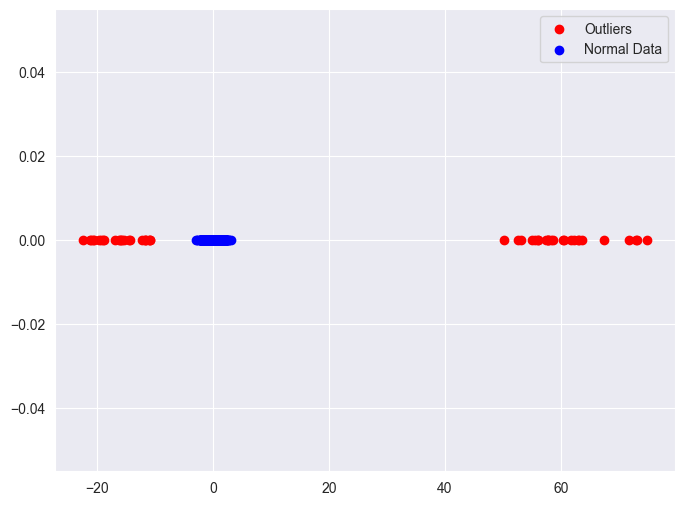

,Без выбросов,С выбросами
,Значение,Значение
Характеристика,,
Q1,-0.598686,-0.625963
Q2,0.065611,0.065909
Q3,0.762766,0.788585
Выборочное среднее,0.074946,1.151364
Медиана,0.065611,0.065909
Мода,-2.943279,-22.442841
Размах выборки,5.971510,97.286987
Интерквартильный размах,1.361452,1.414549


In [14]:
# Добавление выбросов
outliers = np.concat((
    np.random.uniform(low=left_left, high=left_right, size=int(n * proportion * 0.05)),
    np.random.uniform(low=right_left, high=right_right, size=int(n * (1 - proportion) * 0.05))
))
plt.figure(figsize=(8, 6))
plt.scatter(outliers, np.zeros_like(outliers), color='red',
            label=f'Outliers')
plt.scatter(normal_data, np.zeros_like(normal_data), color='blue', label='Normal Data')
plt.legend()
plt.show()
with_outliers_stats = get_stats(np.concat((normal_data, outliers)))
result = pd.concat(
    [normal_stats, with_outliers_stats],
    axis=1,
    keys=['Без выбросов', 'С выбросами']
)
result

In [15]:
# Анализ устойчивости характеристик
outliers_results = (normal_stats.copy())
for persent in range(10, 101, 10):
    outliers = np.random.uniform(low=left_left, high=left_right, size=int(n * proportion * persent / 100))
    outliers = np.concat((
        outliers,
        np.random.uniform(low=right_left, high=right_right, size=int(n * (1 - proportion) * persent / 100))
    ))
    outliers_results[f'Выбросы {persent}%'] = get_stats(np.concat((normal_data, outliers)))
outliers_results

,Значение,Выбросы 10%,Выбросы 20%,Выбросы 30%,Выбросы 40%,Выбросы 50%,Выбросы 60%,Выбросы 70%,Выбросы 80%,Выбросы 90%,Выбросы 100%
Характеристика,,,,,,,,,,,
Q1,-0.598686,-0.655276,-0.777748,-0.851055,-0.939471,-1.057106,-1.139983,-1.334377,-1.552436,-1.765540,-1.932461
Q2,0.065611,0.068527,0.072202,0.073706,0.074767,0.084799,0.087795,0.089465,0.100254,0.118106,0.132300
Q3,0.762766,0.854262,0.926149,1.023927,1.189128,1.297452,1.474022,1.625131,1.910118,2.311848,50.940329
Выборочное среднее,0.074946,2.189114,4.210676,5.643807,6.971979,8.258966,9.221141,10.191836,10.832778,11.665019,12.213406
Медиана,0.065611,0.068527,0.072202,0.073706,0.074767,0.084799,0.087795,0.089465,0.100254,0.118106,0.132300
Мода,-2.943279,-22.959470,-22.728863,-22.998347,-22.988839,-22.857154,-22.996366,-22.862605,-22.925670,-22.945976,-22.999305
Размах выборки,5.971510,97.793187,97.703881,97.990127,97.972108,97.667315,97.893629,97.685842,97.916824,97.922834,97.854381
Интерквартильный размах,1.361452,1.509538,1.703897,1.874982,2.128599,2.354558,2.614006,2.959508,3.462555,4.077388,52.872790
Дисперсия,1.004355,185.462625,357.159201,472.432408,576.357364,676.315956,734.253409,793.783647,840.869520,899.964395,939.165050


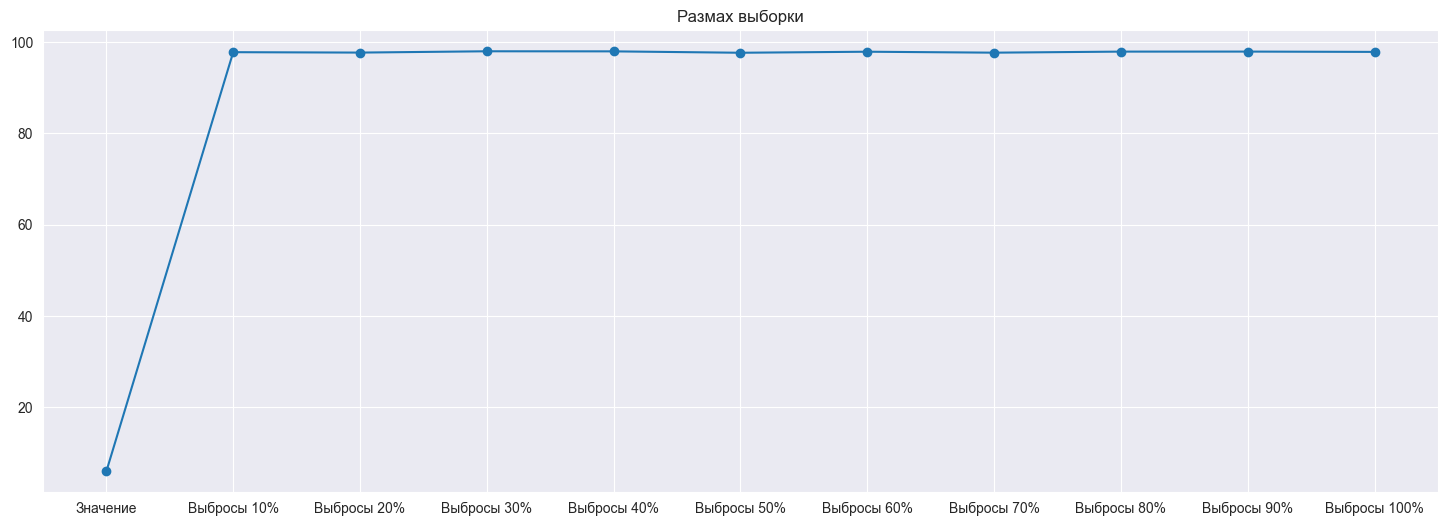

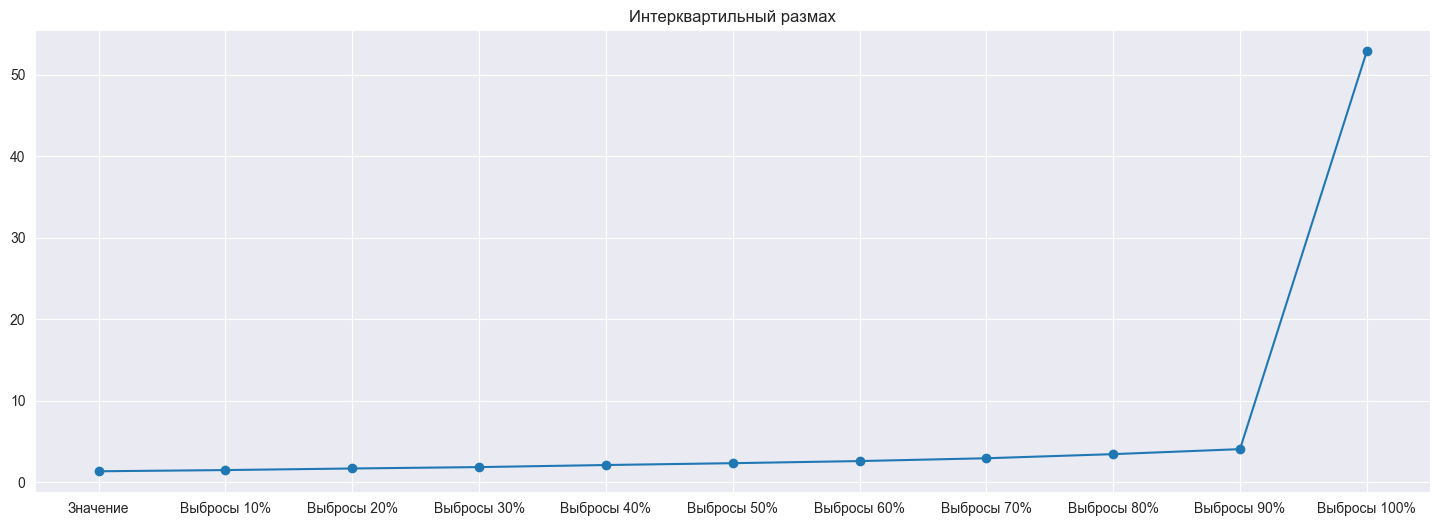

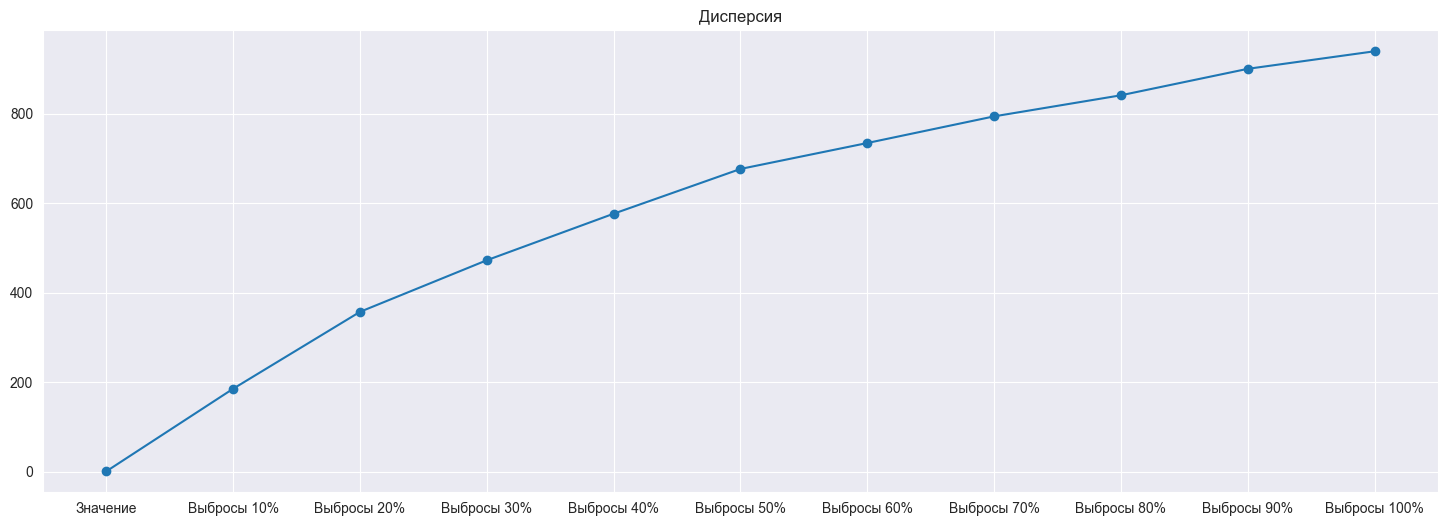

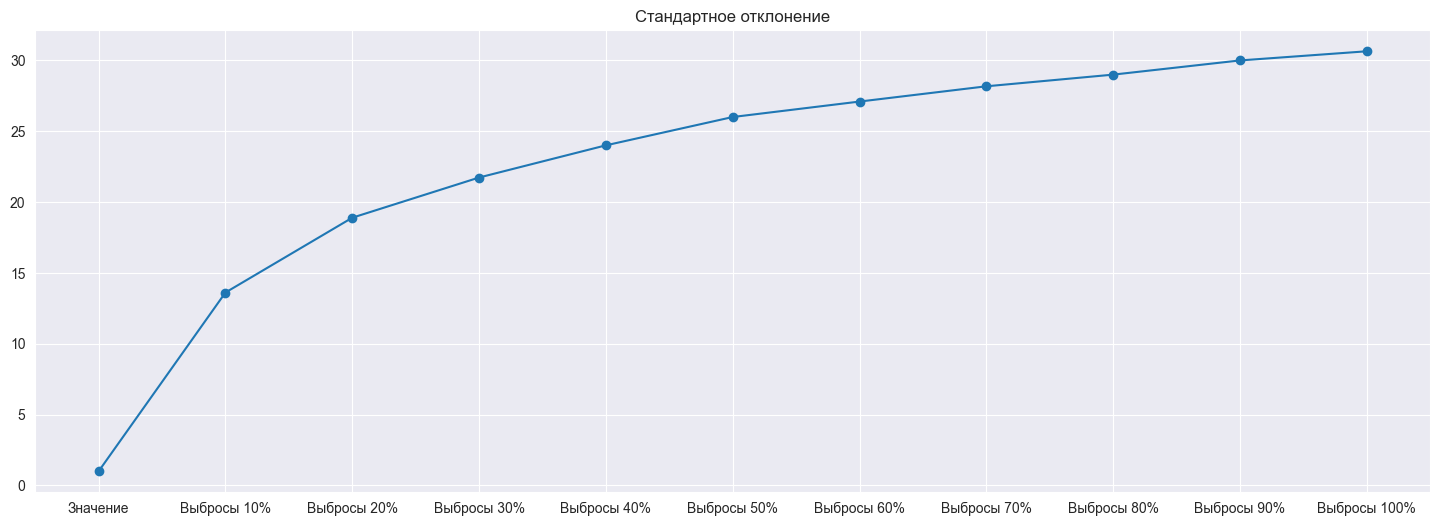

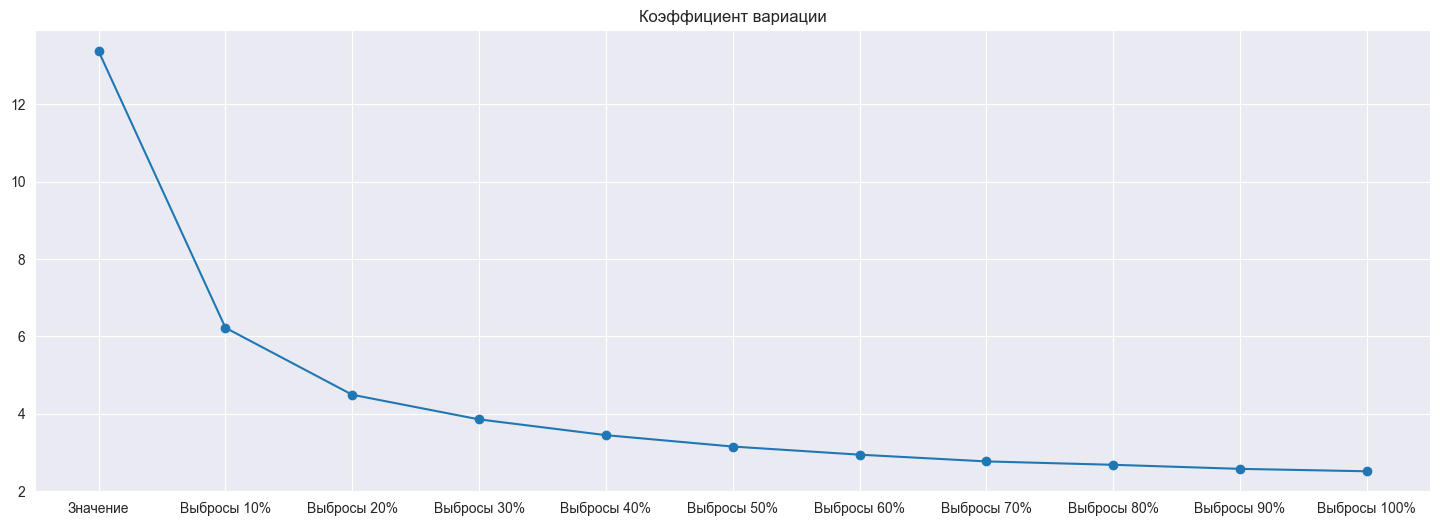

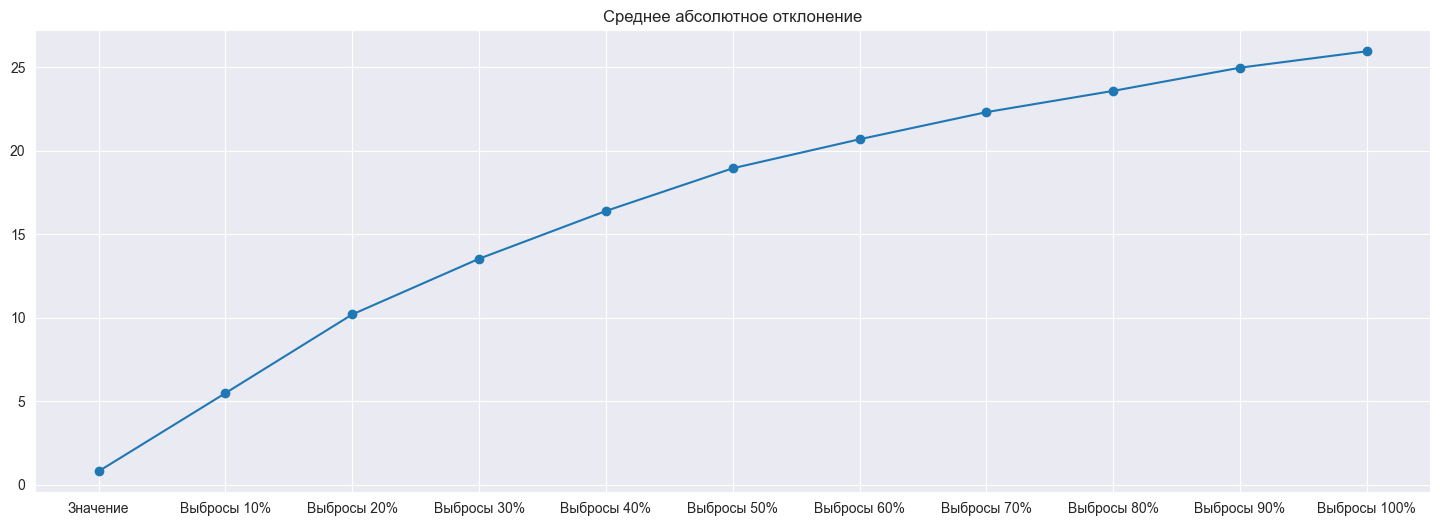

In [16]:
# График изменения мер вариабельности при добавлении выбросов
plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Размах выборки'], marker='o')
plt.title('Размах выборки')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Интерквартильный размах'], marker='o')
plt.title('Интерквартильный размах')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Дисперсия'], marker='o')
plt.title('Дисперсия')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Стандартное отклонение'], marker='o')
plt.title('Стандартное отклонение')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Коэффициент вариации'], marker='o')
plt.title('Коэффициент вариации')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Cреднее абсолютное отклонение'], marker='o')
plt.title('Среднее абсолютное отклонение')
plt.show()